# Exercise H4.2: Comparison of gradient descent methods 

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

data = np.array([[-1, -0.1], [0.3, 0.5], [2, 0.5]])
X = np.array(zip(np.ones(data.shape[0]), data[:, 0])).T
Y = data[:, 1].reshape(1, 3)
W1 = np.array([-0.45, 0.2]).reshape(2,1)


def func_g(w, x, y):
    # x: D*N
    # y: 1*N
    # w: D*1
    H = X.dot(X.T)
    b = -X.dot(Y.T)
    return H.dot(w) + b

## (a) Gradient Descent

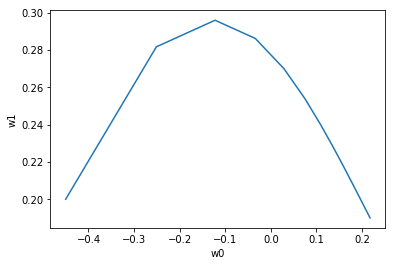

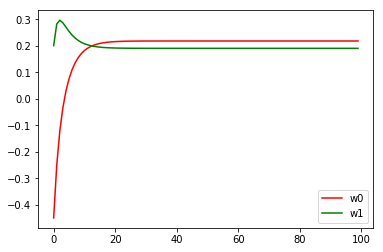

In [2]:
learning_rate = 0.1
w_gradient_descent_array = []
# w_gradient_descent_array.append(W1)
w_tmp = W1
for i in range(0, 100):
    w_gradient_descent_array.append(w_tmp)
    w_tmp = w_tmp - learning_rate * func_g(w_tmp, X, Y)
W = np.array(w_gradient_descent_array).reshape(100, 2)

plt.plot(W[:, 0], W[:, 1])
plt.xlabel('w0')
plt.ylabel("w1")
plt.show()

plt.plot(range(0, W.shape[0]), W[:, 0], color='r', label='w0')
plt.plot(range(0, W.shape[0]), W[:, 1], color='g', label='w1')
plt.legend()
plt.show()


## (b) Line Search

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


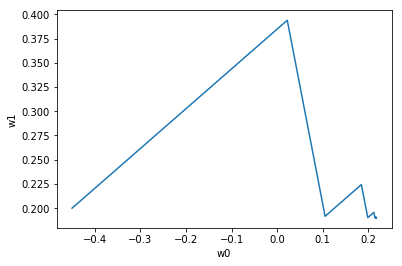

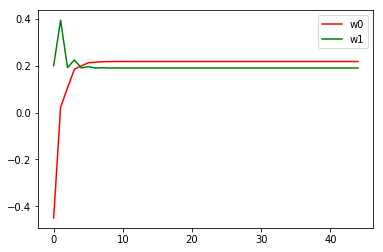

In [3]:
H = X.dot(X.T)

def calc_optimal_step_size(w, gt, dt):
    return dt.T.dot(gt)/(dt.T.dot(H)).dot(dt)

w_gradient_descent_array = []
w_tmp = W1
g1 = func_g(W1, X, Y)
step_size = calc_optimal_step_size(w_tmp, g1, g1)
for i in range(0, 100):
    w_gradient_descent_array.append(w_tmp)
    gt = func_g(w_tmp, X, Y)
    step_size = calc_optimal_step_size(w_tmp, gt, gt)
    w_tmp = w_tmp - step_size * gt
W = np.array(w_gradient_descent_array).reshape(100, 2)

plt.plot(W[:, 0], W[:, 1])
plt.xlabel('w0')
plt.ylabel("w1")
plt.show()

plt.plot(range(0, W.shape[0]), W[:, 0], color='r', label='w0')
plt.plot(range(0, W.shape[0]), W[:, 1], color='g', label='w1')
plt.legend()
plt.show()

## (c)  Conjugate Gradient

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


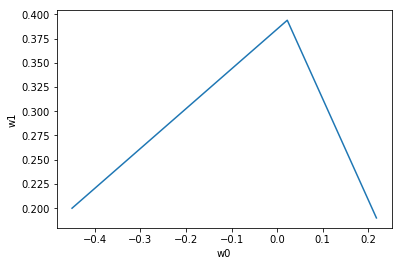

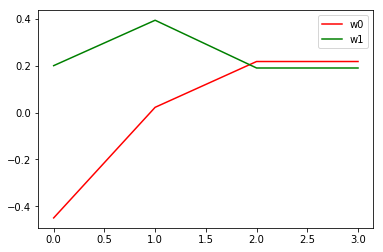

In [4]:
def calc_beta(g_new, g_old):
    return g_new.T.dot(g_new)/g_old.T.dot(g_old)
w_gradient_descent_array = []
w_tmp = W1
g1 = func_g(W1, X, Y)
d1 = -g1
gt_new = g1
dt = d1
step_size = calc_optimal_step_size(w_tmp, g1, d1)
for i in range(0, 100):
    w_gradient_descent_array.append(w_tmp)
    step_size = calc_optimal_step_size(w_tmp, gt_new, dt)
    w_tmp = w_tmp - step_size * dt
    gt_old = gt_new
    gt_new = func_g(w_tmp, X, Y)
    beta = calc_beta(gt_new, gt_old)
    dt = gt_new - beta * dt
W = np.array(w_gradient_descent_array).reshape(100, 2)

plt.plot(W[:, 0], W[:, 1])
plt.xlabel('w0')
plt.ylabel("w1")
plt.show()

plt.plot(range(0, W.shape[0]), W[:, 0], color='r', label='w0')
plt.plot(range(0, W.shape[0]), W[:, 1], color='g', label='w1')
plt.legend()
plt.show()    

For all those 3 methods, the result(w0, w1) could always converge finally. The difference is the rate of convergence. For gradient descent, the learning rate is a constant, while the other 2 (line search and conjugate gradient) calculate optimal step(learning rate) at each iteration. That's why gradient takes much more iterations than the other 2 to converge.

Between line search and conjugate gradient, line search only finds and uses the current optimal learning rate, while the conjugate gradient also calculates the conjugate direction for g<sub>t</sub>. That's why conjugate gradient converges faster than line search.